Taller 2
======

------

El objetivo del taller es ganar un entendimiento más profundo de los temas que entran en el segundo parcial.
Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.

### Evaluación y entrega

- El taller se realiza en grupos de 2 ó 3 personas.
- La evaluación será mediante un coloquio con los docentes durante la clase.

In [1]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

## Ejercicio 1
Dada la siguiente matriz
$$
A =
\begin{pmatrix}
	1 & \sqrt{3} & 0 \\
	\sqrt{3} & 4 & \sqrt{3}/2 \\
	0 & \sqrt{3}/2 & 7/4
\end{pmatrix}
$$

Hallar $A = U \Sigma V^t$ la descomposición en valores singulares de $A$ utilizando únicamente la función [eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) de Numpy para calcular los autovalores y autovectores necesarios.

__Sugerencia__: Considerar alguna propiedad de la matriz que pueda resultar de utilidad para simplificar los cálculos. 


In [2]:
A = np.array([[1,          np.sqrt(3),   0           ],
              [np.sqrt(3), 4,            np.sqrt(3)/2],
              [0,          np.sqrt(3)/2, 7/4         ]])



In [3]:
def descomponer(A):
  lambs, U = eig(A @ A.T)
  lambs, V = eig(A.T @ A)
  Sigma = U.T @ A @ V

  return U, Sigma, V

In [6]:
X = np.array([
              [1, 1],
              [0, 0],
              [1, 1]
])

U, Sigma, V = descomponer(X)

print(U)
print(Sigma)
print(V)

print(U @ Sigma @ V.T)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]]
[[2.00000000e+00 3.33066907e-16]
 [3.14018492e-16 4.93038066e-32]
 [0.00000000e+00 0.00000000e+00]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[1. 1.]
 [0. 0.]
 [1. 1.]]


## Ejercicio 2


Dado el siguiente sistema lineal sobredeterminado:

$$
A x = b \\
\begin{pmatrix}
1  & 0  & 0 \\
0  & 1  & 0 \\
0  & 0  & 1 \\
-1 & 1  & 0 \\
0  & -1 & 0 \\
-1 & 0  & 1
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 
2 \\ 
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$

- Hallar $x^*$ mediante cuadrados mínimos, utilizando ecuaciones normales. ¿Bajo que condiciones esta solución es única?


- Probar que el residuo, $r = b-Ax$ resulta ortogonal a $Im(A)$ si $x = x^*$ es la solución de cuadrados mínimos


- Dar una interpretación geométrica de la solución de cuadrados mínimos lineales para *este ejemplo*.

__Sugerencia:__ Utilizar la función [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) de Numpy para encontrar la solución de un sistema determinado.


In [84]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1, 1, 0],
              [0, -1, 0],
              [-1, 0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])

x = np.linalg.solve(A.T @ A, A.T @ b)

# Prueba con numpy para verificar
x_np = np.linalg.lstsq(A, b)[0]

np.allclose(x, x_np)

# Como esto da 0 entonces se cumple que r es ortogonal a la imagen de A.
r = b - A @ x_np
print(A.T @ r)

# A @ x = (x_a, x_b, x_c, -x_a + x_b, -x_b, -x_a + x_c)


[-1.11022302e-15  1.33226763e-15  1.99840144e-15]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


## Ejercicio 3

- Completar los métodos de Jacobi y Gauss-Seidel. Tener en cuenta que las funciones también deben devolver el vector de errores que resulta de comparar la solución aproximada de una iteración contra la solución conocida $x\_direct$ obtenida mediante la  función [solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) de Numpy.

- Probar los métodos con la matriz A (definida en el código), graficar y  analizar el error de la solución. ¿Converge a una solución?¿Cómo podría justificarse lo anterior?


In [ ]:
def jacobi(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    D = np.diagflat(np.diag(A))
    L = np.tril(-(A - D))
    U = np.triu(-(A - D))
    
    T = np.linalg.inv(D) @ (L + U)
    c = np.linalg.inv(D) @ b
  
    xi = x_ini
    error = []
    for i in range(reps):
        xi = T @ xi + c
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error

In [49]:
A = np.array([
              [5, 2, -2],
              [1, 3, 1],
              [2, 2, 6]
])
b = np.array([4, -1, 1])
x_exp = np.array([11 / 10, -57 / 80, 3 / 80])

x, err = jacobi(A, b, 100, np.zeros(3), x_exp)

x

array([ 1.1   , -0.7125,  0.0375])

In [ ]:
def gauss_seidel(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    D = np.diagflat(np.diag(A))
    L = np.tril(-(A - D))
    U = np.triu(-(A - D))
    
    T = np.linalg.inv(D - L) @ U
    c = np.linalg.inv(D - L) @ b

    xi = x_ini
    error = []
    for i in range(reps):
        xi = T @ xi + c
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error

In [51]:
A = np.array([
              [5, 2, -2],
              [1, 3, 1],
              [2, 2, 6]
])
b = np.array([4, -1, 1])
x_exp = np.array([11 / 10, -57 / 80, 3 / 80])

x, err = gauss_seidel(A, b, 100, np.zeros(3), x_exp)

x

array([ 1.1   , -0.7125,  0.0375])

Jacobi:
Estimacion: [ 0.73045612 -1.32921366  2.79533341]
Respuesta correcta [ 0.74628648 -1.36616872  2.88528748]


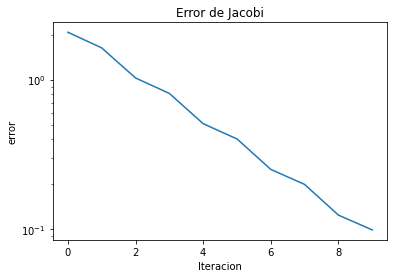

In [53]:
A = np.array([[8,np.sqrt(2),1/3],
              [np.sqrt(3),10, 5.5],
              [0,1 , 7/6]])
b = np.array([5,3.5,2])

x = np.linalg.solve(A,b)

x_jacobi, error = jacobi(A, b, 10, np.zeros(len(x)), x)

print("Jacobi:")
print("Estimacion:", x_jacobi)
print("Respuesta correcta", x)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

Gauss-Seidel:
Estimacion: [ 0.74545748 -1.36325462  2.88278967]
Respuesta correcta [ 0.74628648 -1.36616872  2.88528748]


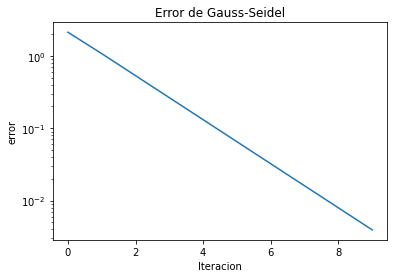

In [54]:
# Idem para gauss-seidel
x_gs, error = gauss_seidel(A, b, 10, np.zeros(len(x)), x)

print("Gauss-Seidel:")
print("Estimacion:", x_gs)
print("Respuesta correcta", x)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()



## Ejercicio 4


Considerar los siguientes datos que fueron generados a partir de un polinomio de grado 2:

$$p(x) = 4 x + 0.5 x^2 + C$$

donde $C$ ruido agregado con distribución normal

Los mismos serán los datos a ajustar utilizando cuadrados mínimos lineales.

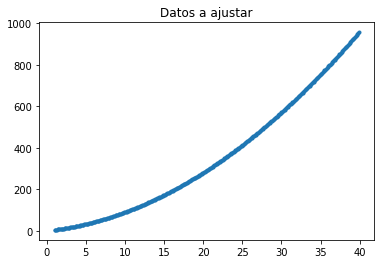

In [68]:
def p(x):
    'implementar la funcion p(x) enunciada en la celda de arriba'
    'tener en cuenta que x está en R'
    
    C = np.random.normal()
    y = 4 * x + 0.5 * x ** 2 + C
    return y

# Creo valores entre 1 y 40 espaciados 0.1
x = np.arange(1, 40, 0.1)
y = p(x)

plt.plot(x, y, '.')
plt.title('Datos a ajustar')
plt.show()

### Propuesta: 
La idea será ajustar un polinomio $f(x)$ de grado 4 a los datos anteriores. 
Es decir, considerando la familia de funciones $F = \{x,x^{2},x^{3},x^{4}\}$ queremos encontrar una función $f(x) = a_{0}x+a_{1}x^{2}+a_{2}x^{3}+a_{3}x^{4}$, una combinación lineal de ellas, que "mejor aproxime", en términos de cuadrados mínimos, a $p(x)$. 

### Implementación:
Para esto, podríamos utilizar cuadrados mínimos a través de ecuaciones normales resueltas por un método directo (_np.linalg.solve_).
Recordar que la matriz A de CML tiene la siguiente forma:
$$A=
\begin{pmatrix}
\delta_{1}(x_{1}) & \delta_{2}(x_{1}) & \ldots  & \delta_{n}(x_{1}) \\
\vdots & \vdots & \ldots & \vdots \\
\delta_{1}(x_{m}) & \delta_{2}(x_{m}) & \ldots  & \delta_{n}(x_{m}) \\
\end{pmatrix} $$


En este caso particular, utilizando la función [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) y el vector x creado previamente, buscamos:

$$A=
\begin{pmatrix}
x_{1} & x_{1}^{2} & x_{1}^{3} & x_{1}^{4} \\
\vdots & \vdots & \ldots & \vdots \\
x_{390} & x_{390}^{2} & x_{390}^{3} & x_{390}^{4} \\
\end{pmatrix} $$



In [70]:
A = np.stack([x, x ** 2, x ** 3, x ** 4]).T
b = y

AtA = A.T @ A 
Atb = A.T @ b

x_direct = np.linalg.solve(AtA, Atb)
print("Solucion encontrada:" + str(x_direct)) 

Solucion encontrada:[ 4.23829281e+00  4.79348331e-01  6.84797607e-04 -7.68047185e-06]


### Responder:

- Estimar la solución de cuadrados mínimos utilizando los métodos iterativos del punto 3 y graficar los errores de los métodos (con respecto a la solución hallada con el método directo) en función de las iteraciones.
- Indicar si los métodos convergen. Justificar adecuadamente.



Jacobi:
Estimacion: [-5.77830641e+09 -1.94864843e+08 -5.74648301e+06 -1.59853982e+05]
Respuesta correcta [ 4.23829281e+00  4.79348331e-01  6.84797607e-04 -7.68047185e-06]


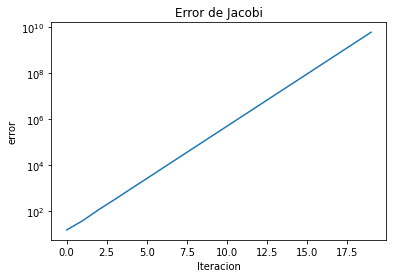

Gauss-Seidel:
Estimacion: [8.80199683e+00 1.96759899e-01 3.01148960e-03 4.70845789e-05]
Respuesta correcta [ 4.23829281e+00  4.79348331e-01  6.84797607e-04 -7.68047185e-06]


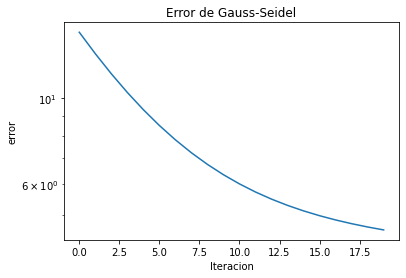

In [75]:
# Jacobi
x_ini = np.zeros(AtA.shape[1])
reps = 20
x_jacobi, error = jacobi(AtA, Atb, reps, x_ini, x_direct)

print("Jacobi:")
print("Estimacion:", x_jacobi)
print("Respuesta correcta", x_direct)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()


# Gauss-Seidel
reps = 20
x_ini = np.zeros(AtA.shape[1])
x_gs, error = gauss_seidel(AtA, Atb, reps, x_ini, x_direct)

print("Gauss-Seidel:")
print("Estimacion:", x_gs)
print("Respuesta correcta", x_direct)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()

### Ajustando la función

Recapitulando, queríamos encontrar con CML los coeficientes para $f(x) = a_{0}x+a_{1}x^{2}+a_{2}x^{3}+a_{3}x^{4}$. 

Para encontrar la solución, utilizamos ecuaciones normales que resolvimos primero utilizando un método directo y luego uno iterativo. Idealmente, ambas soluciones deberían "parecerse".

Finalmente, nos interesa ver como se ajusta nuestra función a los datos originales.

### Responder: 
- A partir de lo anterior, fittear la función estimada, f(x) a los datos originales. Mostrar en un gráfico.
- ¿Qué puede decirse sobre los valores estimados de los coeficientes de mayor grado?

In [ ]:
def f(x,coef):
    'implementar la funcion f(x) que ajustará a los datos'
    'tener en cuenta que x esta en R y coef es el vector con los coeficientes a_0 ... a_3'
    
    y = 0
    for i in range(len(coef)):
      y += coef[i] * x ** (i + 1)
    
    return y

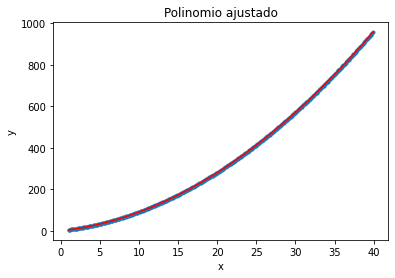

In [79]:
coef = [4.23829281e+00, 4.79348331e-01, 6.84797607e-04, -7.68047185e-06]
y_pred = f(x,coef)

plt.plot(x,y, '.') # puntos originales

plt.plot(x,y_pred, 'r') # puntos estimados

plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y");

In [ ]:
### Predicciones
# Vimos que otra de las aplicaciones de este método es poder predecir la variable dependiente para instancias desconocidas. Para ver esto, podemos tomar otro rango de valores de x y observar como se "extrapola"

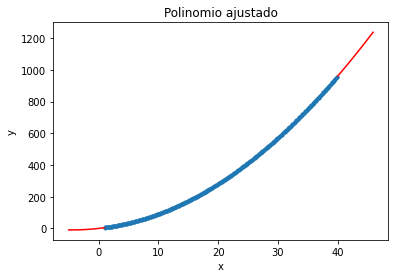

In [83]:
x_new  = np.concatenate([np.arange(-5, 1, 0.1),[np.nan],np.arange(40, 46, 0.1)])
y_pred = f(x_new, coef)

# Puntos originales
plt.plot(x,y, '.')

# Puntos estimados
plt.plot(x_new,y_pred, 'r') 


plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y");
